# West Nile Virus Prediction

West Nile virus dataset could get from Kaggle website, https://www.kaggle.com/c/predict-west-nile-virus/overview. The purpose for this project is to develop the model to predict the mosquitos have infected West Nile virus or not. The models that use in this project are logistic regression and random forest.

In [1]:
import pandas as pd
import numpy as np
from sklearn import ensemble, preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
# Load dataset 
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")
sample = pd.read_csv("../input/sampleSubmission.csv")
weather = pd.read_csv("../input/weather.csv")

# Get labels
labels = train.WnvPresent.values

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
# Check null value on train dataset

train.isnull().sum()

Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
NumMosquitos              0
WnvPresent                0
dtype: int64

In [5]:
# Check null value on test dataset

test.isnull().sum()

Id                        0
Date                      0
Address                   0
Species                   0
Block                     0
Street                    0
Trap                      0
AddressNumberAndStreet    0
Latitude                  0
Longitude                 0
AddressAccuracy           0
dtype: int64

In [6]:
# Check null value on weather dataset

weather.isnull().sum()

Station        0
Date           0
Tmax           0
Tmin           0
Tavg           0
Depart         0
DewPoint       0
WetBulb        0
Heat           0
Cool           0
Sunrise        0
Sunset         0
CodeSum        0
Depth          0
Water1         0
SnowFall       0
PrecipTotal    0
StnPressure    0
SeaLevel       0
ResultSpeed    0
ResultDir      0
AvgSpeed       0
dtype: int64

In [7]:
# Check frequency of weather condition

print("FC:", weather.CodeSum.str.contains('FC').sum())
print("TS:", weather.CodeSum.str.contains('TS').sum())
print("GR:", weather.CodeSum.str.contains('GR').sum())
print("RA:", weather.CodeSum.str.contains('RA').sum())
print("DZ:", weather.CodeSum.str.contains('DZ').sum())

print("SN:", weather.CodeSum.str.contains('SN').sum())
print("SG:", weather.CodeSum.str.contains('SG').sum())
print("GS:", weather.CodeSum.str.contains('GS').sum())
print("PL:", weather.CodeSum.str.contains('PL').sum())
print("IC:", weather.CodeSum.str.contains('IC').sum())

print("FG:", weather.CodeSum.str.contains('FG').sum())
print("BR:", weather.CodeSum.str.contains('BR').sum())
print("UP:", weather.CodeSum.str.contains('UP').sum())
print("HZ:", weather.CodeSum.str.contains('HZ').sum())
print("FU:", weather.CodeSum.str.contains('FU').sum())
print("VA:", weather.CodeSum.str.contains('VA').sum())

print("DU:", weather.CodeSum.str.contains('DU').sum())
print("DS:", weather.CodeSum.str.contains('DS').sum())
print("PO:", weather.CodeSum.str.contains('PO').sum())
print("SA:", weather.CodeSum.str.contains('SA').sum())
print("SS:", weather.CodeSum.str.contains('SS').sum())
print("PY:", weather.CodeSum.str.contains('PY').sum())

print("SQ:", weather.CodeSum.str.contains('SQ').sum())
print("DR:", weather.CodeSum.str.contains('DR').sum())
print("SH:", weather.CodeSum.str.contains('SH').sum())
print("FZ:", weather.CodeSum.str.contains('FZ').sum())
print("MI:", weather.CodeSum.str.contains('MI').sum())
print("PR:", weather.CodeSum.str.contains('PR').sum())

print("BC:", weather.CodeSum.str.contains('BC').sum())
print("BL:", weather.CodeSum.str.contains('BL').sum())
print("VC:", weather.CodeSum.str.contains('VC').sum())

print("No Value:", (weather['CodeSum']==' ').sum())

FC: 0
TS: 353
GR: 1
RA: 1035
DZ: 133
SN: 6
SG: 0
GS: 0
PL: 0
IC: 0
FG: 41
BR: 813
UP: 0
HZ: 263
FU: 9
VA: 0
DU: 0
DS: 0
PO: 0
SA: 0
SS: 0
PY: 0
SQ: 3
DR: 0
SH: 0
FZ: 0
MI: 3
PR: 0
BC: 5
BL: 0
VC: 23
No Value: 1609


In [8]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [9]:
# Create new features by weather condition 

weather['CodeSum_TS'] = np.where(weather['CodeSum'].str.contains('TS') == True, 1, 0)
weather['CodeSum_RA'] = np.where(weather['CodeSum'].str.contains('RA') == True, 1, 0)
weather['CodeSum_DZ'] = np.where(weather['CodeSum'].str.contains('DZ') == True, 1, 0)
weather['CodeSum_FG'] = np.where(weather['CodeSum'].str.contains('FG') == True, 1, 0)
weather['CodeSum_BR'] = np.where(weather['CodeSum'].str.contains('BR') == True, 1, 0)
weather['CodeSum_HZ'] = np.where(weather['CodeSum'].str.contains('HZ') == True, 1, 0)
weather['CodeSum_MO'] = np.where(weather['CodeSum'] == ' ', 1, 0)

In [10]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed,CodeSum_TS,CodeSum_RA,CodeSum_DZ,CodeSum_FG,CodeSum_BR,CodeSum_HZ,CodeSum_MO
0,1,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2,0,0,0,0,0,0,1
1,2,2007-05-01,84,52,68,M,51,57,0,3,-,-,,M,M,M,0.00,29.18,29.82,2.7,25,9.6,0,0,0,0,0,0,1
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4,0,0,0,0,1,0,0
3,2,2007-05-02,60,43,52,M,42,47,13,0,-,-,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4,0,0,0,0,1,1,0
4,1,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9,0,0,0,0,0,0,1


In [11]:
# Drop CodeSum column
weather = weather.drop('CodeSum', axis=1)

# Create weather from station 1 and 2 separately
weather_st1 = weather[weather['Station']==1]
weather_st2 = weather[weather['Station']==2]
weather_st1 = weather_st1.drop('Station', axis=1)
weather_st2 = weather_st2.drop('Station', axis=1)

# Merge these 2 stations
weather = weather_st1.merge(weather_st2, on='Date')

# Replace some missing values and T with -1
weather = weather.replace('M', -1)
weather = weather.replace('-', -1)
weather = weather.replace('T', -1)
weather = weather.replace(' T', -1)
weather = weather.replace('  T', -1)

In [12]:
weather.head()

,Date,Tmax_x,Tmin_x,Tavg_x,Depart_x,DewPoint_x,WetBulb_x,Heat_x,Cool_x,Sunrise_x,Sunset_x,Depth_x,Water1_x,SnowFall_x,PrecipTotal_x,StnPressure_x,SeaLevel_x,ResultSpeed_x,ResultDir_x,AvgSpeed_x,CodeSum_TS_x,CodeSum_RA_x,CodeSum_DZ_x,CodeSum_FG_x,CodeSum_BR_x,CodeSum_HZ_x,CodeSum_MO_x,Tmax_y,Tmin_y,Tavg_y,Depart_y,DewPoint_y,WetBulb_y,Heat_y,Cool_y,Sunrise_y,Sunset_y,Depth_y,Water1_y,SnowFall_y,PrecipTotal_y,StnPressure_y,SeaLevel_y,ResultSpeed_y,ResultDir_y,AvgSpeed_y,CodeSum_TS_y,CodeSum_RA_y,CodeSum_DZ_y,CodeSum_FG_y,CodeSum_BR_y,CodeSum_HZ_y,CodeSum_MO_y
0,2007-05-01,83,50,67,14,51,56,0,2,0448,1849,0,-1,0.0,0.00,29.10,29.82,1.7,27,9.2,0,0,0,0,0,0,1,84,52,68,-1,51,57,0,3,-1,-1,-1,-1,-1,0.00,29.18,29.82,2.7,25,9.6,0,0,0,0,0,0,1
1,2007-05-02,59,42,51,-3,42,47,14,0,0447,1850,0,-1,0.0,0.00,29.38,30.09,13.0,4,13.4,0,0,0,0,1,0,0,60,43,52,-1,42,47,13,0,-1,-1,-1,-1,-1,0.00,29.44,30.08,13.3,2,13.4,0,0,0,0,1,1,0
2,2007-05-03,66,46,56,2,40,48,9,0,0446,1851,0,-1,0.0,0.00,29.39,30.12,11.7,7,11.9,0,0,0,0,0,0,1,67,48,58,-1,40,50,7,0,-1,-1,-1,-1,-1,0.00,29.46,30.12,12.9,6,13.2,0,0,0,0,0,1,0
3,2007-05-04,66,49,58,4,41,50,7,0,0444,1852,0,-1,0.0,-1,29.31,30.05,10.4,8,10.8,0,1,0,0,0,0,0,78,51,-1,-1,42,50,-1,-1,-1,-1,-1,-1,-1,0.00,29.36,30.04,10.1,7,10.4,0,0,0,0,0,0,1
4,2007-05-05,66,53,60,5,38,49,5,0,0443,1853,0,-1,0.0,-1,29.40,30.10,11.7,7,12.0,0,0,0,0,0,0,1,66,54,60,-1,39,50,5,0,-1,-1,-1,-1,-1,-1,29.46,30.09,11.2,7,11.5,0,0,0,0,0,0,1


In [13]:
# Merge with weather data
train = train.merge(weather, on='Date')
test = test.merge(weather, on='Date')

In [14]:
# Drop address columns
train = train.drop(['Address', 'AddressNumberAndStreet'], axis = 1)
test = test.drop(['Address', 'AddressNumberAndStreet'], axis = 1)

# Drop columns that the value is -1
train = train.loc[:,(train != -1).any(axis=0)]
test = test.loc[:,(test != -1).any(axis=0)]

In [15]:
# Convert categorical data to numbers

labelencoder  = preprocessing.LabelEncoder()
labelencoder .fit(list(train['Species'].values) + list(test['Species'].values))
train['Species'] = labelencoder .transform(train['Species'].values)
test['Species'] = labelencoder .transform(test['Species'].values)

labelencoder .fit(list(train['Street'].values) + list(test['Street'].values))
train['Street'] = labelencoder .transform(train['Street'].values)
test['Street'] = labelencoder .transform(test['Street'].values)

labelencoder .fit(list(train['Trap'].values) + list(test['Trap'].values))
train['Trap'] = labelencoder .transform(train['Trap'].values)
test['Trap'] = labelencoder .transform(test['Trap'].values)

In [16]:
# Convert data type to numeric on train data

train[['Tavg_x', 'Depart_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'Sunrise_x', 
       'Sunset_x', 'Depth_x', 'SnowFall_x', 'PrecipTotal_x', 'StnPressure_x', 
       'SeaLevel_x', 'AvgSpeed_x', 'Tavg_y', 'WetBulb_y', 'Heat_y', 'Cool_y', 
       'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y', 
       'AvgSpeed_y']] = train[['Tavg_x', 'Depart_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 
                               'Sunrise_x', 'Sunset_x', 'Depth_x', 'SnowFall_x', 'PrecipTotal_x', 
                               'StnPressure_x', 'SeaLevel_x', 'AvgSpeed_x', 'Tavg_y', 'WetBulb_y', 
                               'Heat_y', 'Cool_y', 'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y', 
                               'AvgSpeed_y']].apply(pd.to_numeric) 
print(train.dtypes)

Date                object
Species              int32
Block                int64
Street               int32
Trap                 int32
Latitude           float64
Longitude          float64
AddressAccuracy      int64
NumMosquitos         int64
WnvPresent           int64
Tmax_x               int64
Tmin_x               int64
Tavg_x               int64
Depart_x             int64
DewPoint_x           int64
WetBulb_x            int64
Heat_x               int64
Cool_x               int64
Sunrise_x            int64
Sunset_x             int64
Depth_x              int64
SnowFall_x         float64
PrecipTotal_x      float64
StnPressure_x      float64
SeaLevel_x         float64
ResultSpeed_x      float64
ResultDir_x          int64
AvgSpeed_x         float64
CodeSum_TS_x         int32
CodeSum_RA_x         int32
CodeSum_DZ_x         int32
CodeSum_FG_x         int32
CodeSum_BR_x         int32
CodeSum_HZ_x         int32
CodeSum_MO_x         int32
Tmax_y               int64
Tmin_y               int64
T

In [17]:
# Convert data type to numeric on test data

test[['Tavg_x', 'Depart_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 'Sunrise_x', 
       'Sunset_x', 'Depth_x', 'SnowFall_x', 'PrecipTotal_x', 'StnPressure_x', 
       'SeaLevel_x', 'AvgSpeed_x', 'Tavg_y', 'WetBulb_y', 'Heat_y', 'Cool_y', 
       'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y', 
       'AvgSpeed_y']] = test[['Tavg_x', 'Depart_x', 'WetBulb_x', 'Heat_x', 'Cool_x', 
                               'Sunrise_x', 'Sunset_x', 'Depth_x', 'SnowFall_x', 'PrecipTotal_x', 
                               'StnPressure_x', 'SeaLevel_x', 'AvgSpeed_x', 'Tavg_y', 'WetBulb_y', 
                               'Heat_y', 'Cool_y', 'PrecipTotal_y', 'StnPressure_y', 'SeaLevel_y', 
                               'AvgSpeed_y']].apply(pd.to_numeric) 
print(test.dtypes)

Id                   int64
Date                object
Species              int32
Block                int64
Street               int32
Trap                 int32
Latitude           float64
Longitude          float64
AddressAccuracy      int64
Tmax_x               int64
Tmin_x               int64
Tavg_x               int64
Depart_x             int64
DewPoint_x           int64
WetBulb_x            int64
Heat_x               int64
Cool_x               int64
Sunrise_x            int64
Sunset_x             int64
Depth_x              int64
SnowFall_x         float64
PrecipTotal_x      float64
StnPressure_x      float64
SeaLevel_x         float64
ResultSpeed_x      float64
ResultDir_x          int64
AvgSpeed_x         float64
CodeSum_TS_x         int32
CodeSum_RA_x         int32
CodeSum_DZ_x         int32
CodeSum_FG_x         int32
CodeSum_BR_x         int32
CodeSum_HZ_x         int32
CodeSum_MO_x         int32
Tmax_y               int64
Tmin_y               int64
Tavg_y               int64
D

In [18]:
# For checking

train_c = pd.read_csv("../input/train.csv")
test_c = pd.read_csv("../input/test.csv")

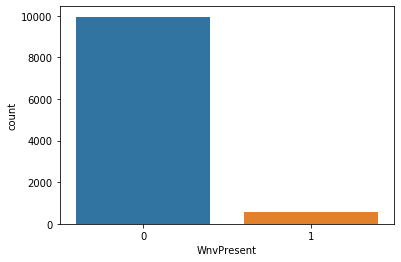

In [19]:
# Check number of labels in train

labels_c = train_c[["WnvPresent"]]
sns.countplot(x='WnvPresent', data=labels_c)
plt.show()

In [20]:
# Count value

labels_c['WnvPresent'].value_counts()

0    9955
1     551
Name: WnvPresent, dtype: int64

C:\Users\win10-user\anaconda3\lib\site-packages\seaborn\categorical.py:3720: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


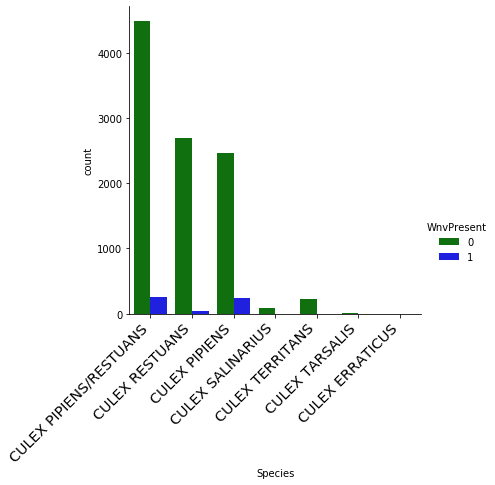

In [21]:
# Plot number of count by mosquito spicies on train data

fig, ax = plt.subplots()

sns.catplot("Species", hue="WnvPresent", data=train_c, kind="count", 
            palette={1:"blue", 0:"green"}, ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.set_xlabel("Species")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

color_patches = [
    Patch(facecolor="blue", label="infected"),
    Patch(facecolor="green", label="did not infected")
]

ax.legend(handles=color_patches)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

fig.suptitle("Species Title");

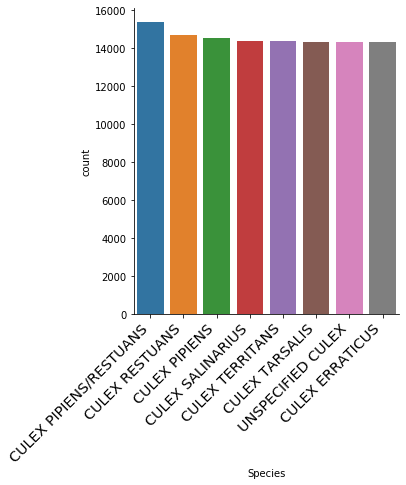

In [22]:
# Plot number of count by mosquito spicies on test data

fig, ax = plt.subplots()

sns.catplot("Species", data=test_c, kind="count", ax=ax)

plt.close(1) # catplot creates an extra figure we don't need

ax.set_xlabel("Species")
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax.legend(handles=color_patches)

plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

fig.suptitle("Species Title");

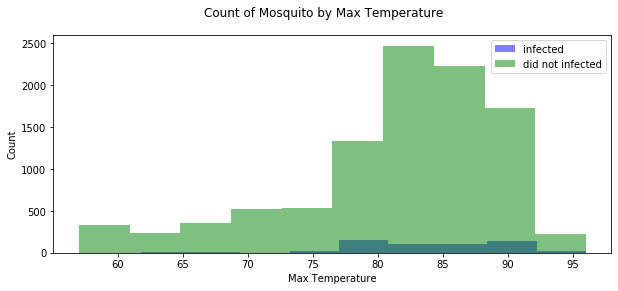

<Figure size 1080x288 with 0 Axes>

In [23]:
# Plot number of mosquito count by max temperature

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Tmax_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Tmax_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Max Temperature")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Max Temperature")

ax.legend();

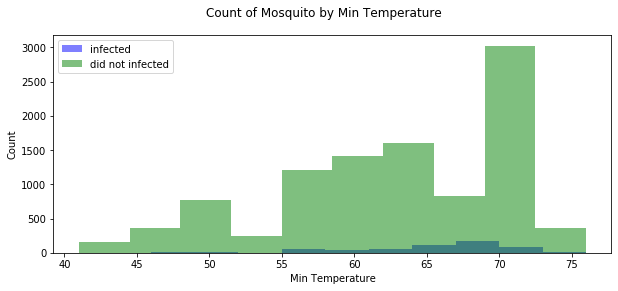

<Figure size 1080x288 with 0 Axes>

In [24]:
# Plot number of mosquito count by min temperature

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Tmin_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Tmin_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Min Temperature")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Min Temperature")

ax.legend();

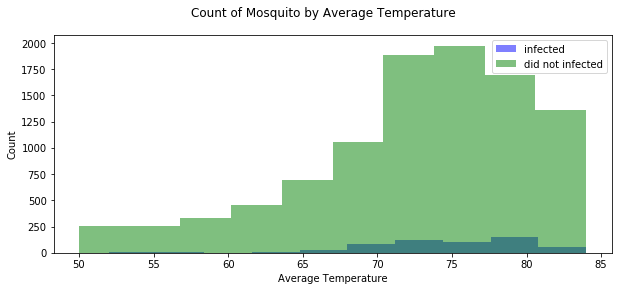

<Figure size 1080x288 with 0 Axes>

In [25]:
# Plot number of mosquito count by average temperature

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Tavg_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Tavg_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Average Temperature")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Average Temperature")

ax.legend();

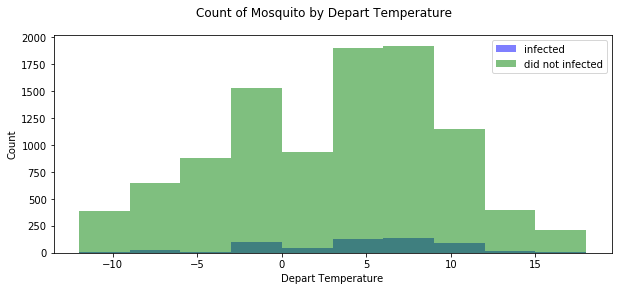

<Figure size 1080x288 with 0 Axes>

In [26]:
# Plot number of mosquito count by depart temperature

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Depart_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Depart_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Depart Temperature")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Depart Temperature")

ax.legend();

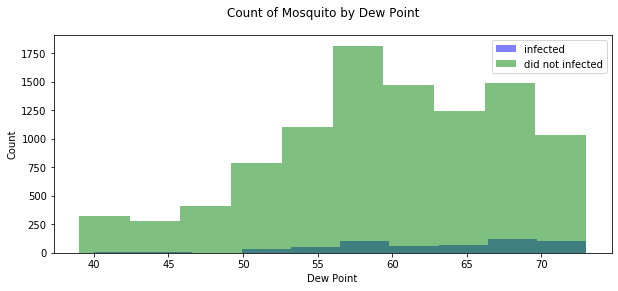

<Figure size 1080x288 with 0 Axes>

In [27]:
# Plot number of mosquito count by dew point

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["DewPoint_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["DewPoint_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Dew Point")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Dew Point")

ax.legend();

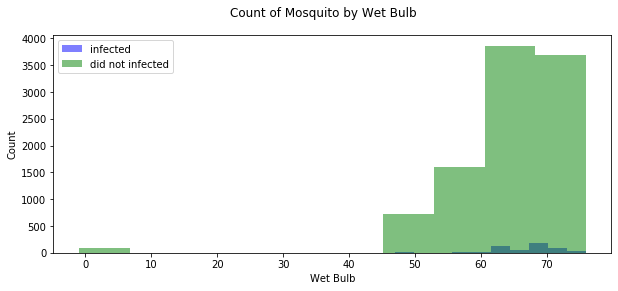

<Figure size 1080x288 with 0 Axes>

In [28]:
# Plot number of mosquito count by wet bulb

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["WetBulb_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["WetBulb_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Wet Bulb")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Wet Bulb")

ax.legend();

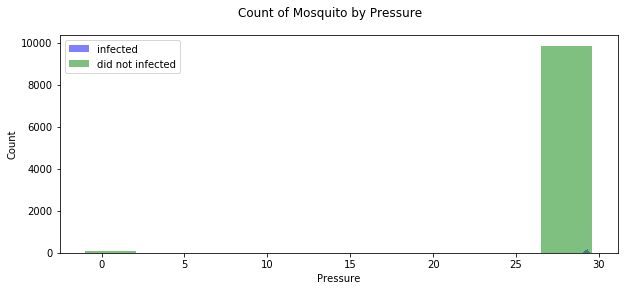

<Figure size 1080x288 with 0 Axes>

In [29]:
# Plot number of mosquito count by pressure

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["StnPressure_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["StnPressure_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Pressure")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Pressure")

ax.legend();

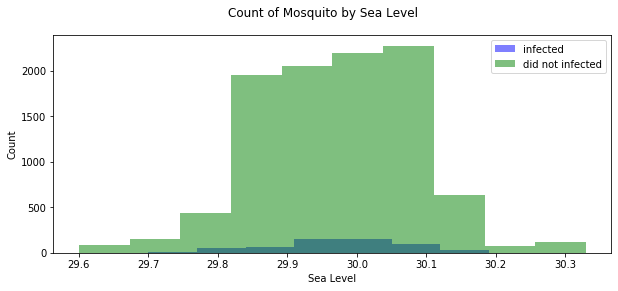

<Figure size 1080x288 with 0 Axes>

In [30]:
# Plot number of mosquito count by sea level

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["SeaLevel_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["SeaLevel_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Sea Level")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Sea Level")

ax.legend();

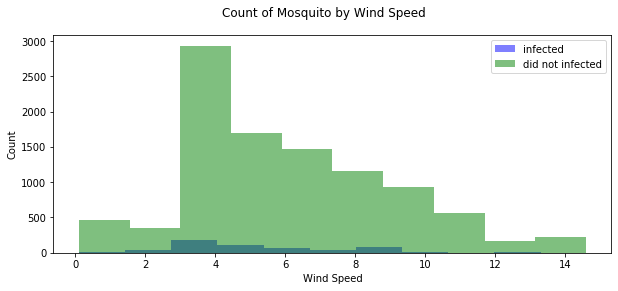

<Figure size 1080x288 with 0 Axes>

In [31]:
# Plot number of mosquito count by wind speed

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["ResultSpeed_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["ResultSpeed_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Wind Speed")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Wind Speed")

ax.legend();

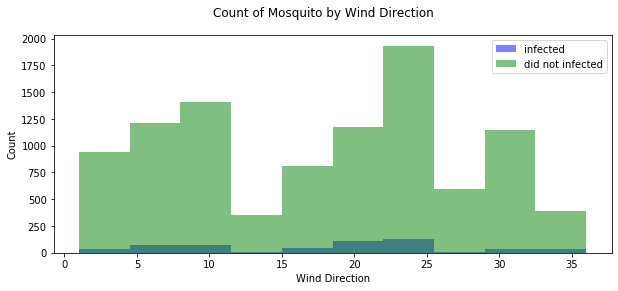

<Figure size 1080x288 with 0 Axes>

In [32]:
# Plot number of mosquito count by wind direction

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["ResultDir_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["ResultDir_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Wind Direction")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Wind Direction")

ax.legend();

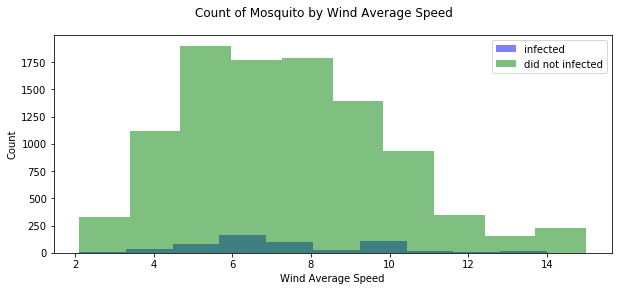

<Figure size 1080x288 with 0 Axes>

In [33]:
# Plot number of mosquito count by wind average speed

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["AvgSpeed_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["AvgSpeed_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Wind Average Speed")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Wind Average Speed")

ax.legend();

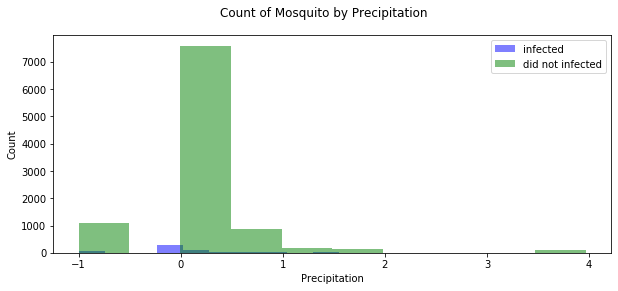

<Figure size 1080x288 with 0 Axes>

In [34]:
# Plot number of mosquito count by precipitation

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["PrecipTotal_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["PrecipTotal_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Precipitation")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Precipitation")

ax.legend();

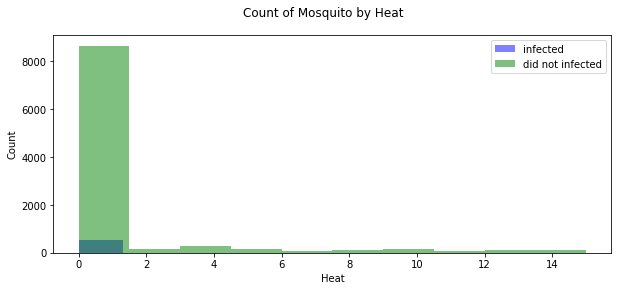

<Figure size 1080x288 with 0 Axes>

In [35]:
# Plot number of mosquito count by heat

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Heat_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Heat_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Heat")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Heat")

ax.legend();

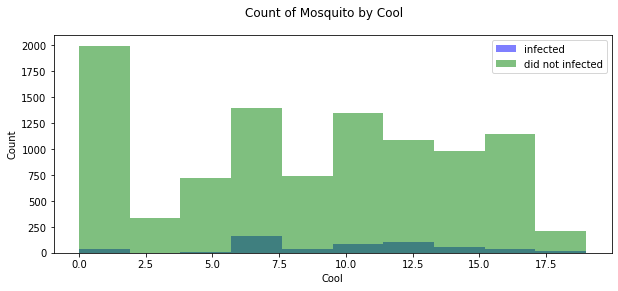

<Figure size 1080x288 with 0 Axes>

In [36]:
# Plot number of mosquito count by cool

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["Cool_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["Cool_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Cool")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Cool")

ax.legend();

In [37]:
# Replace -1 with median of its column

train['Depart_x'] = train['Depart_x'].replace(-1, np.nan)
train['WetBulb_x'] = train['WetBulb_x'].replace(-1, np.nan)
train['SnowFall_x'] = train['SnowFall_x'].replace(-1, np.nan)
train['PrecipTotal_x'] = train['PrecipTotal_x'].replace(-1, np.nan)
train['StnPressure_x'] = train['StnPressure_x'].replace(-1, np.nan)
train['PrecipTotal_y'] = train['PrecipTotal_y'].replace(-1, np.nan)


train['Depart_x'] = train['Depart_x'].replace(np.nan, train['Depart_x'].median())
train['WetBulb_x'] = train['WetBulb_x'].replace(np.nan, train['WetBulb_x'].median())
train['SnowFall_x'] = train['SnowFall_x'].replace(np.nan, train['SnowFall_x'].median())
train['PrecipTotal_x'] = train['PrecipTotal_x'].replace(np.nan, train['PrecipTotal_x'].median())
train['StnPressure_x'] = train['StnPressure_x'].replace(np.nan, train['StnPressure_x'].median())
train['PrecipTotal_y'] = train['PrecipTotal_y'].replace(np.nan, train['PrecipTotal_y'].median())





test['SnowFall_x'] = test['SnowFall_x'].replace(-1, np.nan)
test['PrecipTotal_x'] = test['PrecipTotal_x'].replace(-1, np.nan)
test['PrecipTotal_y'] = test['PrecipTotal_y'].replace(-1, np.nan)


test['SnowFall_x'] = test['SnowFall_x'].replace(np.nan, test['SnowFall_x'].median())
test['PrecipTotal_x'] = test['PrecipTotal_x'].replace(np.nan, test['PrecipTotal_x'].median())
test['PrecipTotal_y'] = test['PrecipTotal_y'].replace(np.nan, test['PrecipTotal_y'].median())

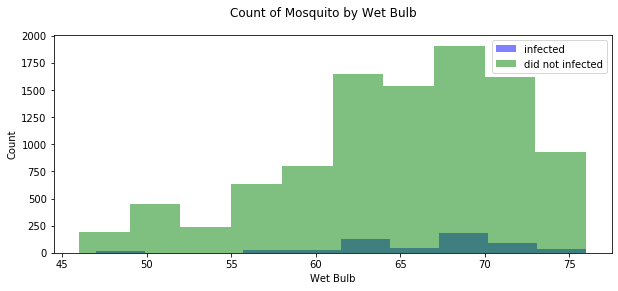

<Figure size 1080x288 with 0 Axes>

In [38]:
# Plot number of mosquito count by wet bulb after impute by median

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["WetBulb_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["WetBulb_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Wet Bulb")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Wet Bulb")

ax.legend();

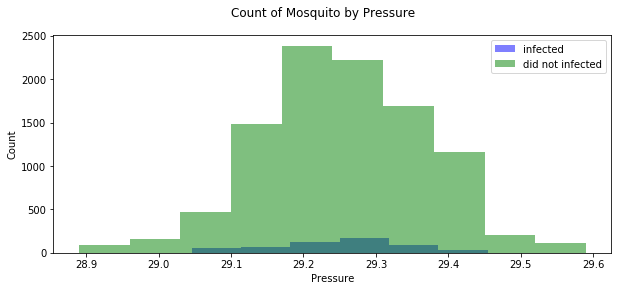

<Figure size 1080x288 with 0 Axes>

In [39]:
# Plot number of mosquito count by pressure after impute by median

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["StnPressure_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["StnPressure_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Pressure")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Pressure")

ax.legend();

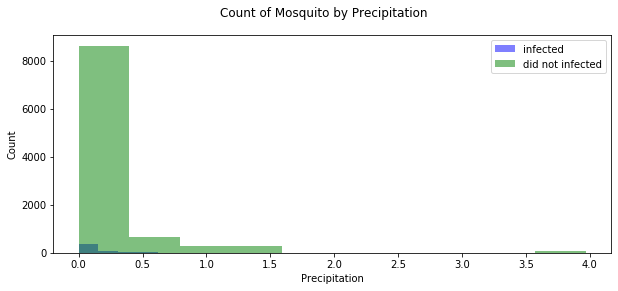

<Figure size 1080x288 with 0 Axes>

In [40]:
# Plot number of mosquito count by precipitation after impute by median

fig, ax = plt.subplots(figsize=(10,4))

plt.figure(figsize=(15,4))

ax.hist(train[train["WnvPresent"]==1]["PrecipTotal_x"], bins=10, alpha=0.5, color="blue", label="infected")
ax.hist(train[train["WnvPresent"]==0]["PrecipTotal_x"], bins=10, alpha=0.5, color="green", label="did not infected")

ax.set_xlabel("Precipitation")
ax.set_ylabel("Count")



fig.suptitle("Count of Mosquito by Precipitation")

ax.legend();

In [41]:
# Drop address and date columns
train = train.drop(['Date', 'WnvPresent', 'NumMosquitos'], axis = 1)
test = test.drop(['Date', 'Id'], axis = 1)

# Train and Evaluate the model

## Random Forest Classifier

In [42]:
# Random Forest Classifier 
rf = ensemble.RandomForestClassifier(n_jobs=-1, n_estimators=1000, min_samples_split=2)
rf.fit(train, labels)

# create predictions and submission file
predictions_rf = rf.predict_proba(test)[:,1]
sample['WnvPresent'] = predictions_rf
sample.to_csv('result_rf.csv', index=False)

In [43]:
predictions_rf

array([0.01755602, 0.00568175, 0.02371006, ..., 0.01232143, 0.01232143,
       0.01874284])

## Logistic Regression

In [44]:
# Logistic Regression

lr = LogisticRegression(random_state=0, max_iter=10000).fit(train, labels)
predictions_lr = lr.predict_proba(test)[:,1]

sample['WnvPresent'] = predictions_lr
sample.to_csv('result_lr.csv', index=False)

In [45]:
predictions_lr

array([0.00621854, 0.00397511, 0.00971575, ..., 0.01675504, 0.00688408,
       0.13901848])